In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

Load the diabetes dataset that is already scaled


In [9]:
diabetes = datasets.load_diabetes()
diabetes = d(diabetes)

sklearn.utils.Bunch

Original dataset before it’s scaled.  Why do we scale our data? 


In [10]:
df_notscaled = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")

Next read up on the diabetes dataset by running this:


In [12]:
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Do EDA to compare the pre-scaled and scaled data
Add code to:
Print dimensions of the dataset (hint run shape function)
Check for missing values
Add five-point summary for the numerical variables (hint: use panda’s describe function)

In [7]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_x = df # will use later
df.head()
df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


Continued EDA


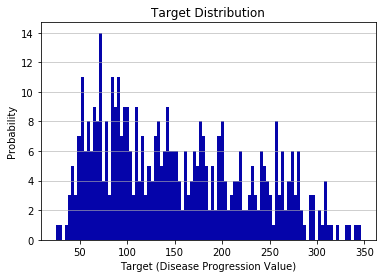

In [24]:
n, bins, patches = plt.hist(x = diabetes.target, bins = 100, color = '#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')
plt.show()



Where is the peak in our values?  Is our target variable skewed?  Which direction?

Below is simple scatter plots of this disease progression value verses four of the predictor variables, BMI, age, sex, and blood pressure, to get a quick veiw of the relationship between the disease progression value and those predictors.


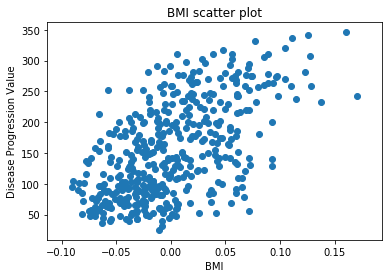

In [14]:
plt.scatter(df.bmi, diabetes.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()


What relationship does BMI and Disease Progression Value and how would you interpret it?<br>
target increases as bmi increases


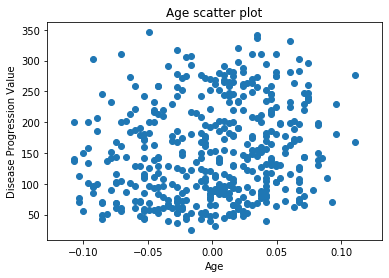

In [15]:
plt.scatter(df.age, diabetes.target)

plt.xlabel('Age')
plt.ylabel('Disease Progression Value')
plt.title('Age scatter plot')
plt.show()

What relationship does Age and Disease Progression Value have and how would you interpret it?<br>
there is no clear relationship between age and target


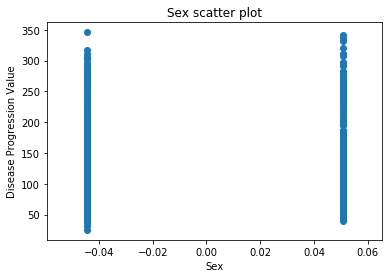

In [25]:
plt.scatter(df.sex, diabetes.target)

plt.xlabel('Sex')
plt.ylabel('Disease Progression Value')
plt.title('Sex scatter plot')
plt.show()

What relationship does Sex and Disease Progression Value have and how would you interpret it?<br>
female seems to have higher target


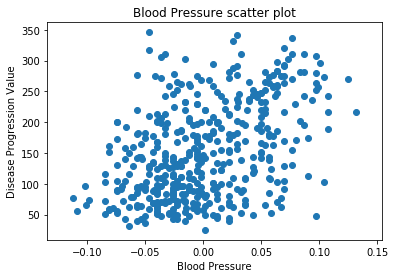

In [26]:
plt.scatter(df.bp, diabetes.target)

plt.xlabel('Blood Pressure')
plt.ylabel('Disease Progression Value')
plt.title('Blood Pressure scatter plot')
plt.show()


What relationship does Blood Pressure and and Disease Progression Value have and how would you interpret it?<br>
target and bloodpressure seem to be positively related.


In [31]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


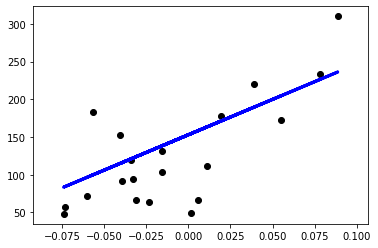

In [36]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

Next run these and try to understand what they mean:
Proportion of Variance Explained
Model Accuracy
 
# model section
Proportion of Variance Explained
Add R squared
# R squared


In [37]:
print('\nVariance score (R squared): %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))



Variance score (R squared): 0.47


Add accuracy measures:
·         Mean Squared Error (MSE)
·         Root Mean Squared Error (RMSE)
# The mean squared error


In [38]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
 
print("Root mean squared error: %.2f"
      % np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred)) )
 
print("\nMean of diabetes target variable = ",diabetes_y_test.mean())
 
print("RMSE percentage of diabetes mean = ", \
      100 * np.sqrt( mean_squared_error(diabetes_y_test, diabetes_y_pred))/diabetes_y_test.mean())


Mean squared error: 2548.07
Root mean squared error: 50.48

Mean of diabetes target variable =  126.2
RMSE percentage of diabetes mean =  39.99875989452684


Text(0.5, 0, 'x (BMI)')

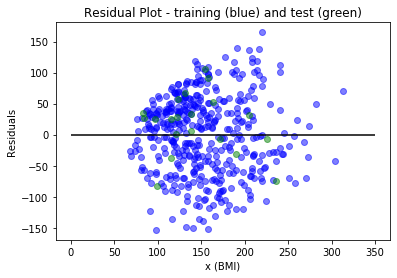

In [43]:
# c = color
# alpha - blending value, between 0 (transparent) and 1 (opaque)
plt.scatter( regr.predict(diabetes_X_train), regr.predict(diabetes_X_train) - diabetes_y_train, c = 'b', alpha = '0.5')
plt.scatter( regr.predict(diabetes_X_test), regr.predict(diabetes_X_test) - diabetes_y_test, c = 'g', alpha = '0.5')
plt.hlines(y = 0, xmin = 0, xmax = 350)
plt.title('Residual Plot - training (blue) and test (green)')
plt.ylabel('Residuals')
plt.xlabel('x (BMI)')



Multiple Linear Regression Model
 
Plot a Correlation Matrix

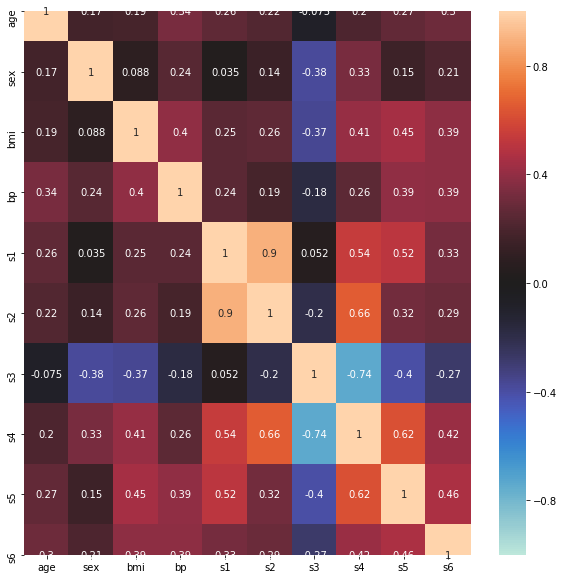

In [44]:
import seaborn as sns
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
fig, ax = plt.subplots(figsize=(10,10))
corrmat = df.corr() # Omit year
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);


Create a multiple linear regression model with all the diabetes predictor variables.
 


In [45]:
import statsmodels.api as sm

diabetes_X = diabetes.data
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)
print ( type(fit.coef_))
 
# https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
# get feature names
colnames = np.asarray(df.columns)
 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
df_tbl
 
#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
lm2.summary()


Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
<class 'numpy.ndarray'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           4.64e-58
Time:                        20:04:38   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df Residuals:                     411   BIC:                             4629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7643      2.658     57.469      0.000     147.539     157.990
x1             0.3035     61.286      0.005      0.996    -120.169     120.776
x2          -237.6393     62.837     -3.782      0.000    -361.162    -114.117
x3           510.5306     68.156      7.491      0.000     376.553     644.508
x4           327.7370     66.876      4.901      0.000     196.275     459.199
x5          -814.1317    424.044     -1.920      0.056   -1647.697      19.434
x6           492.8146    344.227      1.432      0.153    -183.850    1169.480
x7           102.8485    219.463      0.469      0.640    -328.561     534.258
x8           184.6065    167.336      1.103      0.271    -144.334     513.547
x9           743.5196    175.359      4.240      0.000     398.807    1088.232
x10           76.0952     68.293      1.114      0.266     -58.152     210.343
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.421
Skew:                           0.004   Prob(JB):                        0.491
Kurtosis:                       2.716   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""